# Table of Contents
 <p><div class="lev1 toc-item"><a href="#秋田県ネットワークモデル" data-toc-modified-id="秋田県ネットワークモデル-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>秋田県ネットワークモデル</a></div><div class="lev1 toc-item"><a href="#準備" data-toc-modified-id="準備-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>準備</a></div><div class="lev1 toc-item"><a href="#秋田-横手間の経路列挙" data-toc-modified-id="秋田-横手間の経路列挙-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>秋田-横手間の経路列挙</a></div><div class="lev2 toc-item"><a href="#鹿角を通らない経路" data-toc-modified-id="鹿角を通らない経路-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>鹿角を通らない経路</a></div><div class="lev1 toc-item"><a href="#すべての都市間の経路列挙" data-toc-modified-id="すべての都市間の経路列挙-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>すべての都市間の経路列挙</a></div>

#### <br />

<div>
<font size="6">人間情報工学コース　橋本研究室</font>
<br>
<br>
<font size="6">Graphillion Demo Akita Network Model</font>

</div>
<br />
<div style="text-align: right;">
<font size="4"></font>
</div>

<br />

# 秋田県ネットワークモデル

秋田県の行政区分が市の都市をノード，国道，県道，高速道路をリンクとして作成したモデル。  
モデルと都市間を結ぶ道路は以下の通り．

<img src="images/akita_model.png" align="left" alt="" title="" width="600" height="800" />

| 都市の組    | 道路            |
|-------------|-----------------|
| 鹿角-大館   | 国道103号線     |
| 鹿角-北秋田 | 国道103-285号線 |
| 鹿角-潟上   | 国道285号線     |
| 鹿角-仙北   | 国道341号線     |
| 大館-北秋田 | 国道7号線       |
| 大館-潟上   | 国道285号線     |
| 北秋田-能代 | 国道7号線       |
| 北秋田-秋田 | 国道285号線     |
| 北秋田-潟上 | 秋田自動車道    |
| 北秋田-仙北 | 国道105号線     |
| 能代-男鹿   | 国道101号線     |
| 能代-潟上   | 国道7号線       |
| 秋田-潟上       | 県道56号線     |
| 秋田-由利本荘 | 国道7号線      |
| 秋田-大仙       | 秋田自動車道   |
| 秋田-仙北       | 国道46号線     |
| 男鹿-潟上       | 国道101号線    |
| 潟上-仙北       | 秋田自動車道   |
| 由利本荘-にかほ | 国道7号線      |
| 由利本荘-横手   | 国道107号線    |
| 由利本荘-湯沢   | 国道107号線    |
| 大仙-仙北       | 国道105-46号線 |
| 大仙-横手       | 県道71号線     |
| 横手-湯沢       | 湯沢横手道路   |

<br clear="all">

# 準備

必要なライブラリのインポート，描画に必要な位置座標の作成，Graphillionの準備を行う．

In [12]:
from pandas import DataFrame
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.gridspec as gridspace
from graphillion import GraphSet

%matplotlib inline

mpl.rcParams['font.family'] = 'Source Han Code JP'
# mpl.rcParams['axes.titlesize'] = 6
pd.set_option("display.max_rows", 100)

In [13]:
def draw(G, pos, subgraph=None, node_size=1200, font_size=10):
    """
    描画関数
    """
    nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color="w")
    nx.draw_networkx_labels(G, pos, font_family="Source Han Code JP", font_size=font_size)
    nx.draw_networkx_edges(G, pos)
    if subgraph is not None:
        subgraph = nx.Graph(data=subgraph)
        nx.draw_networkx_nodes(subgraph, pos, node_size=node_size, node_color="r")
        nx.draw_networkx_edges(subgraph, pos, edgelist=subgraph.edges(), edge_color="r", width=3.0)
    plt.xticks([])
    plt.yticks([])

In [14]:
# 各市の緯度・経度
Akita = pd.read_csv("resources/akita_cities_coordinates.csv")

# 秋田県モデルの辺を定義
edges = [("鹿角", "大館"), ("鹿角", "北秋田"), ("鹿角", "潟上"), ("鹿角", "仙北"),
         ("大館", "北秋田"), ("大館", "潟上"),
         ("北秋田", "能代"), ("北秋田", "秋田"), ("北秋田", "潟上"), ("北秋田", "仙北"),
         ("能代", "男鹿"), ("能代", "潟上"),
         ("秋田", "潟上"), ("秋田", "由利本荘"), ("秋田", "大仙"), ("秋田", "仙北"),
         ("男鹿", "潟上"),
         ("潟上", "仙北"),
         ("由利本荘", "にかほ"), ("由利本荘", "横手"), ("由利本荘", "湯沢"),
         ("大仙", "仙北"), ("大仙", "横手"),
         ("横手", "湯沢")]

# 描画に必要なノードの位置座標
coordinates = zip(Akita["longitude"], Akita["latitude"])
pos = {city: coordinate for city,coordinate in zip(Akita["city"], coordinates)}

# グラフの作成
G = nx.Graph(data=edges)

# Graphillionに秋田県モデルを読み込ませる
GraphSet.set_universe(edges)

# 秋田-横手間の経路列挙

秋田-横手の経路を求める

In [15]:
paths_akita_yokote = GraphSet.paths("秋田", "横手")
print("秋田-横手の経路総数: ", len(paths_akita_yokote))

秋田-横手の経路総数:  38


38本すべての経路を描画する

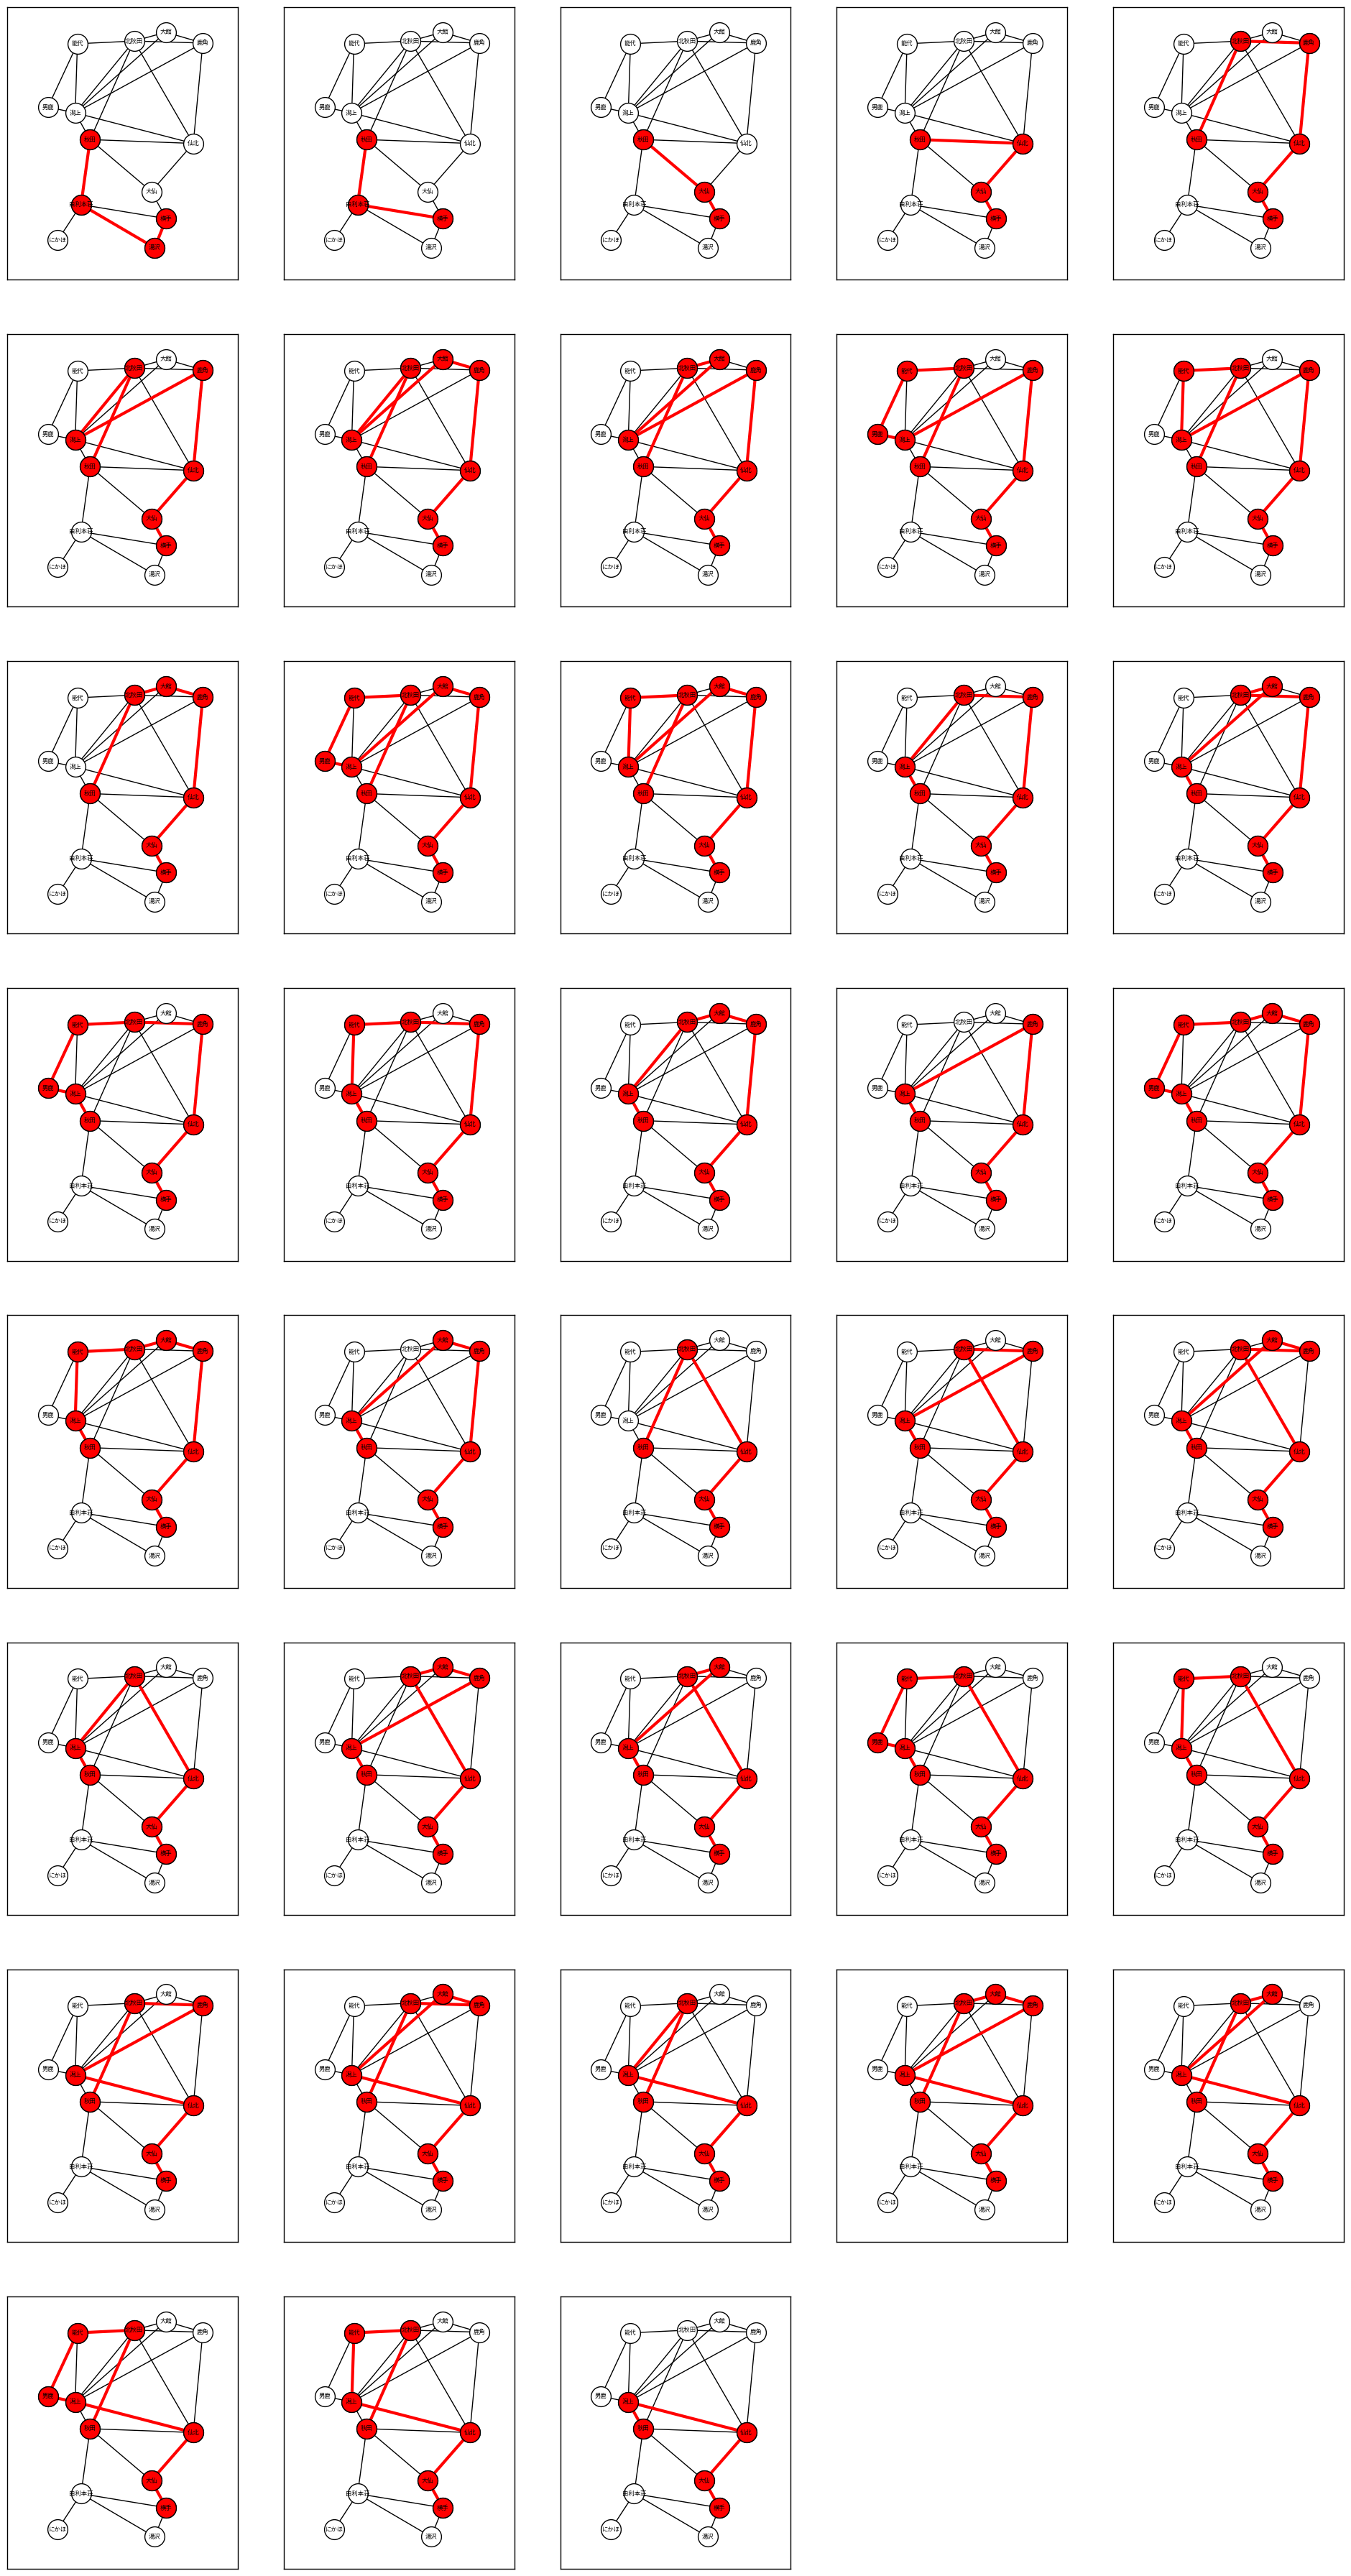

In [16]:
plt.figure(figsize=(24, 46))
for i,path in enumerate(paths_akita_yokote):
    plt.subplot(8, 5, 1+i)
    draw(G, pos, subgraph=path, node_size=400, font_size=6)

## 鹿角を通らない経路

秋田-横手の経路の中で鹿角を通らない経路を求める

In [17]:
paths_akita_yokote_excluding_kaduno = paths_akita_yokote.excluding("鹿角")
print("鹿角を通らない秋田-横手の経路総数: ", len(paths_akita_yokote_excluding_kaduno))

鹿角を通らない秋田-横手の経路総数:  14


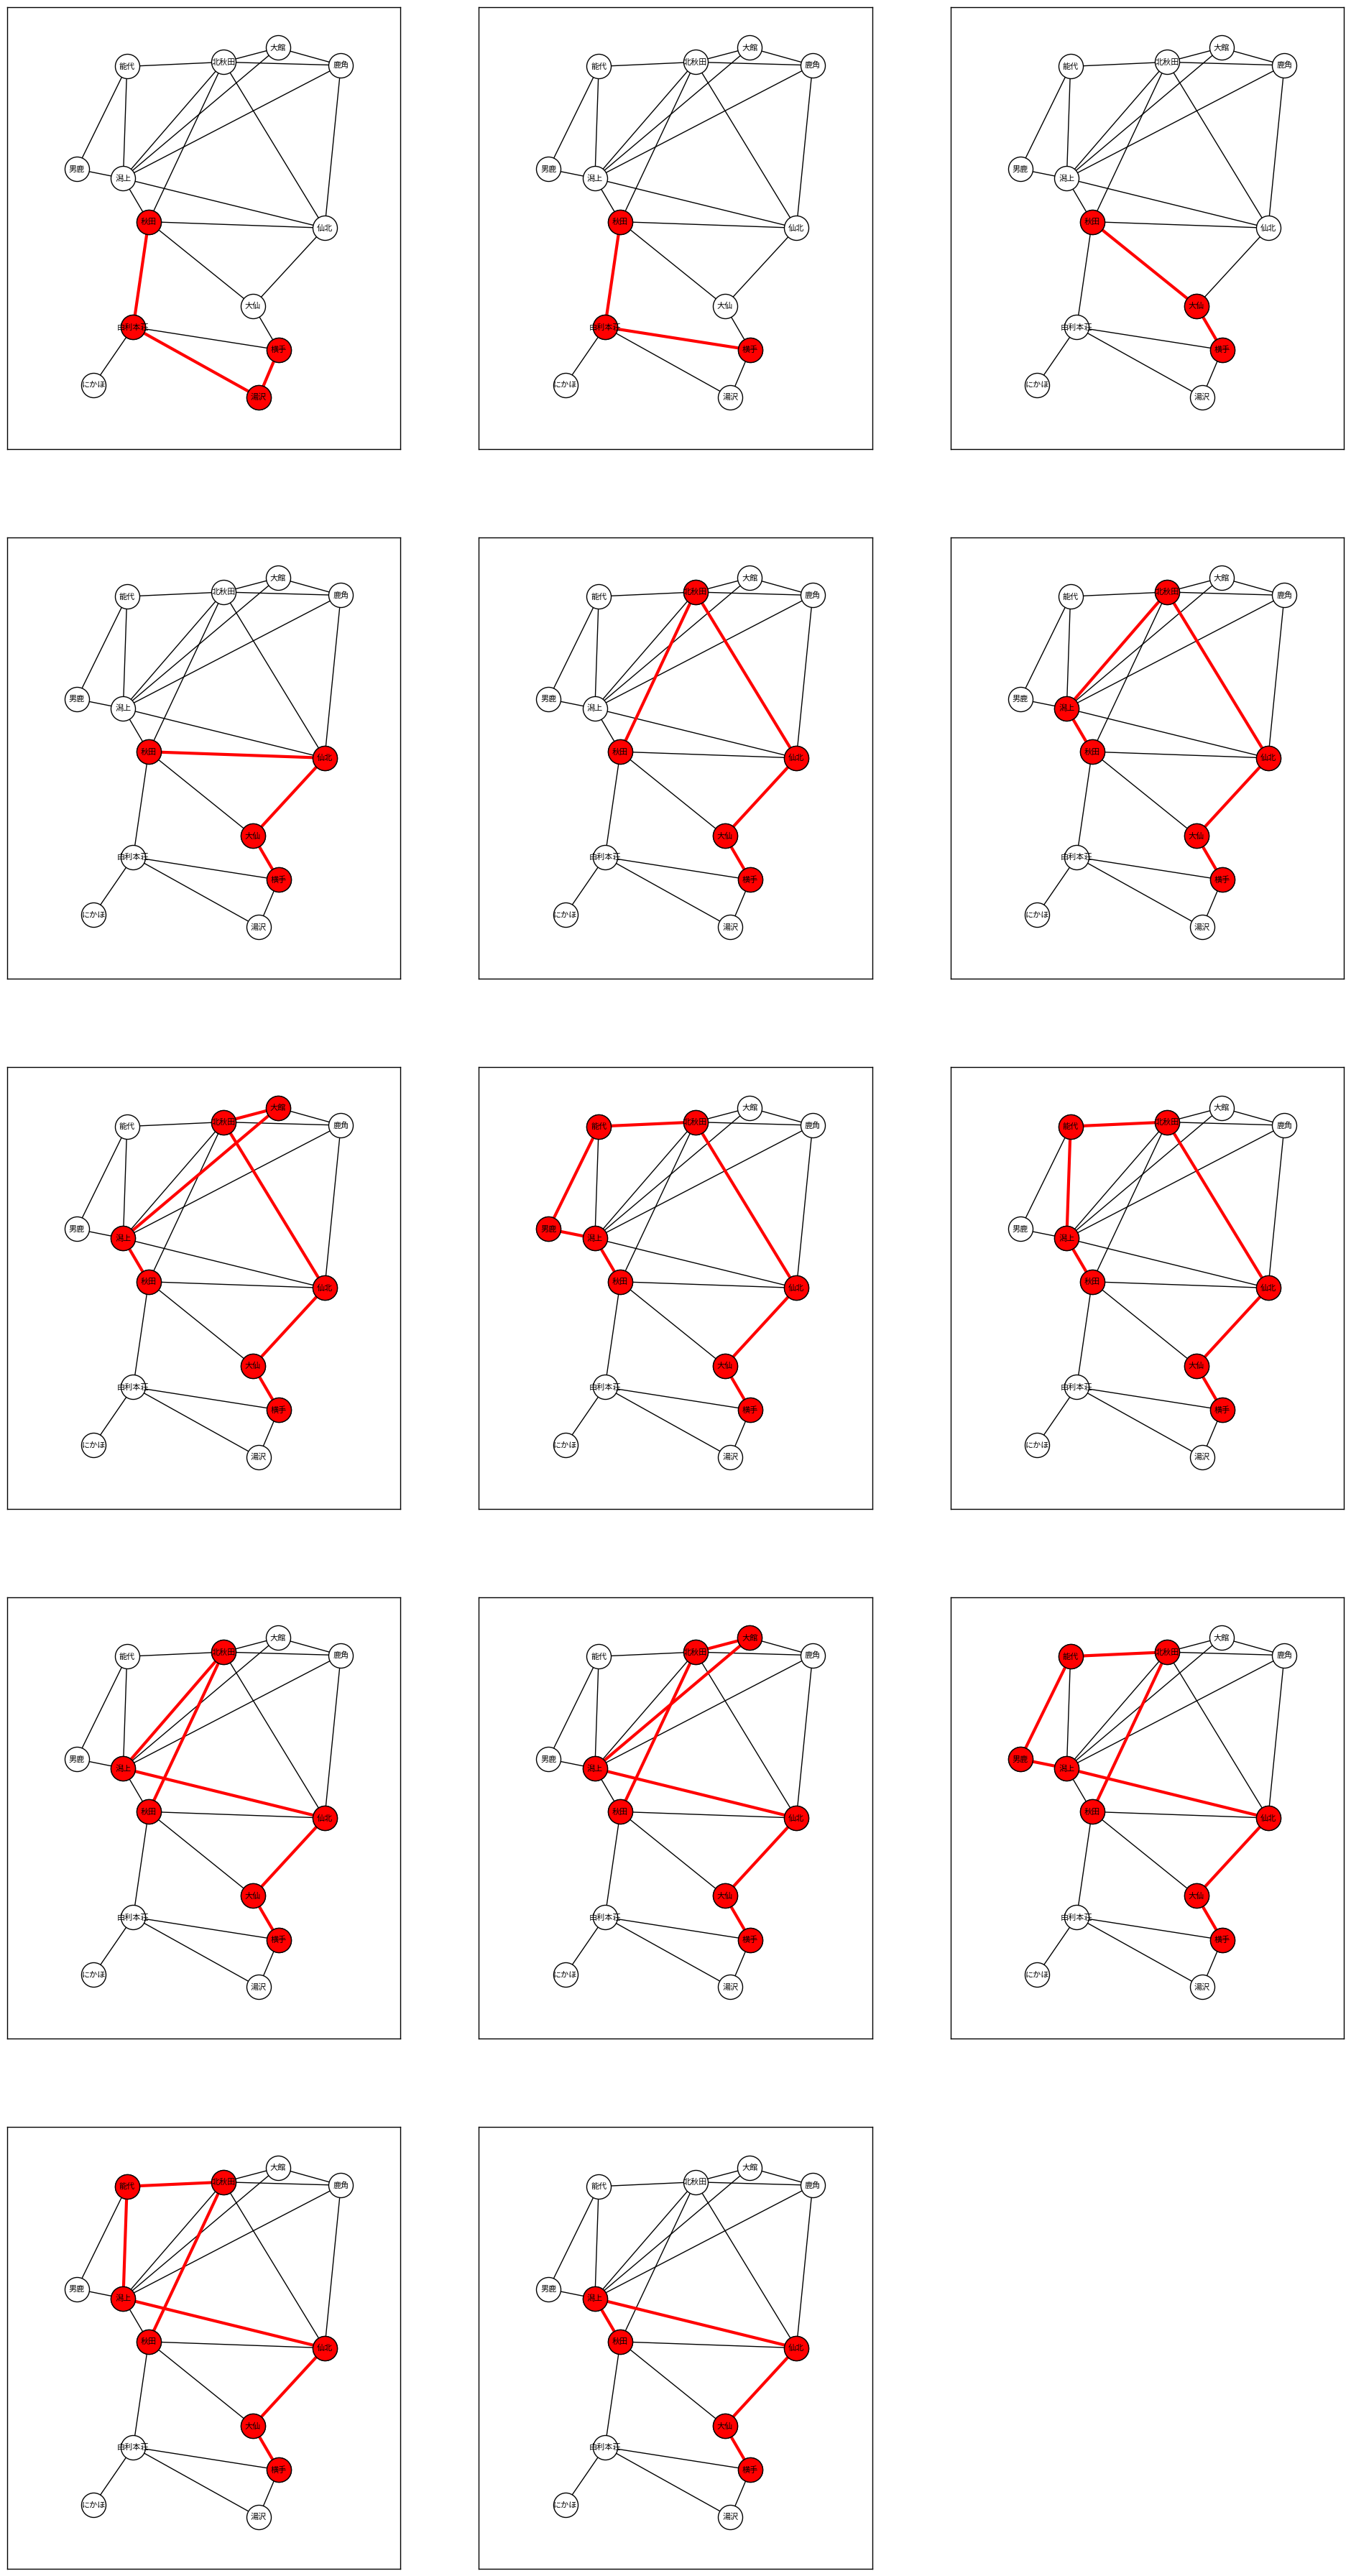

In [18]:
plt.figure(figsize=(24, 46))
for i,path in enumerate(paths_akita_yokote_excluding_kaduno):
    plt.subplot(5, 3, 1+i)
    draw(G, pos, subgraph=path, node_size=600, font_size=8) 

# すべての都市間の経路列挙

２都市間のパスの総数を求める。  
都市の組は${}_{13} \mathrm{C}_2 = 78$通り。

In [19]:
from itertools import combinations
from functools import reduce

all_results = []
nodes = list(set(reduce(lambda x,y: x+y, map(list, edges))))
for i,j in combinations(nodes, 2):
    paths = GraphSet.paths(i, j)
    all_results.append({"都市の組":"{}-{}".format(i, j), "経路数": len(paths)})
DataFrame(all_results, columns=["都市の組", "経路数"])

,都市の組,経路数
0,大仙-横手,73
1,大仙-由利本荘,38
2,大仙-仙北,106
3,大仙-能代,258
4,大仙-北秋田,118
5,大仙-大館,234
6,大仙-鹿角,194
7,大仙-秋田,38
8,大仙-男鹿,274
9,大仙-にかほ,38
